In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load CSV
data = pd.read_csv('emnist-letters-test.csv', header=None)

In [19]:
# Pisahkan label dan gambar
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values.reshape(-1, 28, 28)

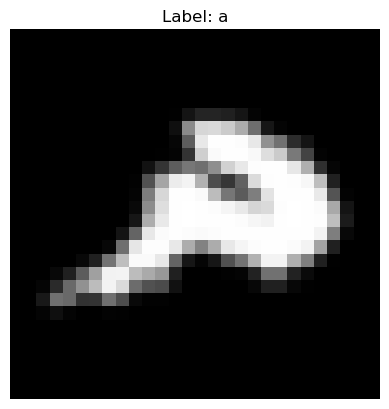

In [20]:
# Tampilkan salah satu gambar
index = 0
plt.imshow(np.rot90(images[index], k=3), cmap='gray')
plt.title(f"Label: {chr(labels[index] + 96)}")  # 1=a, 2=b, ...
plt.axis('off')
plt.show()

In [21]:
print("Jumlah data:", len(images))
print("Dimensi gambar:", images[0].shape)

Jumlah data: 14800
Dimensi gambar: (28, 28)


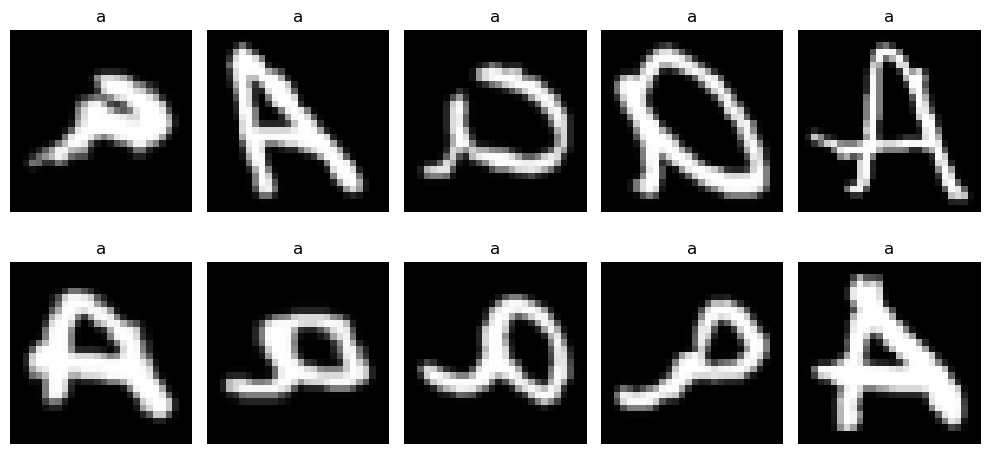

In [22]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.rot90(images[i], k=3), cmap='gray')
    plt.title(chr(labels[i] + 96))
    plt.axis('off')
plt.tight_layout()
plt.show()

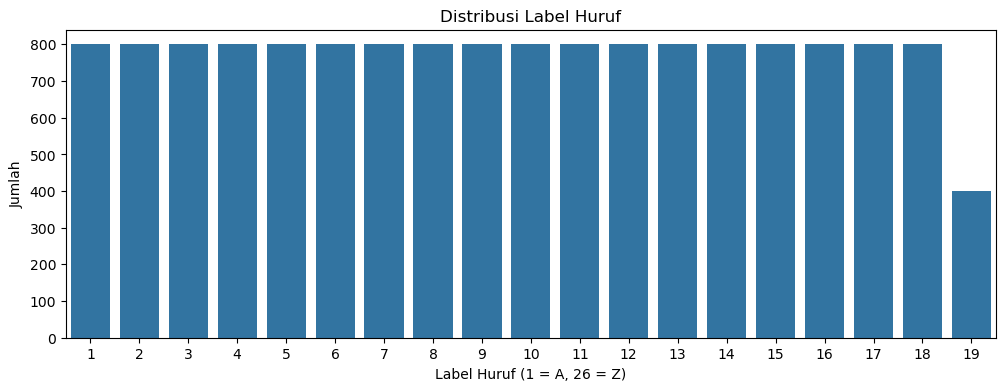

In [23]:
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.countplot(x=labels)
plt.title("Distribusi Label Huruf")
plt.xlabel("Label Huruf (1 = A, 26 = Z)")
plt.ylabel("Jumlah")
plt.show()

In [24]:
from sklearn.utils import shuffle

# Acak data dan ambil 200 sampel
shuffled_images, shuffled_labels = shuffle(images, labels, random_state=42)

sample_images = shuffled_images[:200]
sample_labels = shuffled_labels[:200]

In [25]:
from skimage.feature import hog

# Untuk menghemat waktu, ambil 200 data dulu
sample_images = shuffled_images[:200]
sample_labels = shuffled_labels[:200]

hog_features = []

for img in sample_images:
    # Rotasi agar orientasi huruf benar
    img_rotated = np.rot90(img, k=3)
    
    # Ekstraksi fitur HOG
    features = hog(img_rotated, 
                   orientations=9, 
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), 
                   block_norm='L2-Hys', 
                   visualize=False)
    hog_features.append(features)

hog_features = np.array(hog_features)
print("HOG features shape:", hog_features.shape)

HOG features shape: (200, 144)


In [30]:
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from tqdm import tqdm

X = hog_features
y = sample_labels

clf = svm.SVC(kernel='linear', C=1.0)

loo = LeaveOneOut()
y_true, y_pred = [], []

for train_idx, test_idx in tqdm(loo.split(X), total=len(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(prediction[0])

# Evaluasi
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 57.73it/s]

Accuracy: 0.5550
Precision: 0.5727
F1 Score: 0.5410


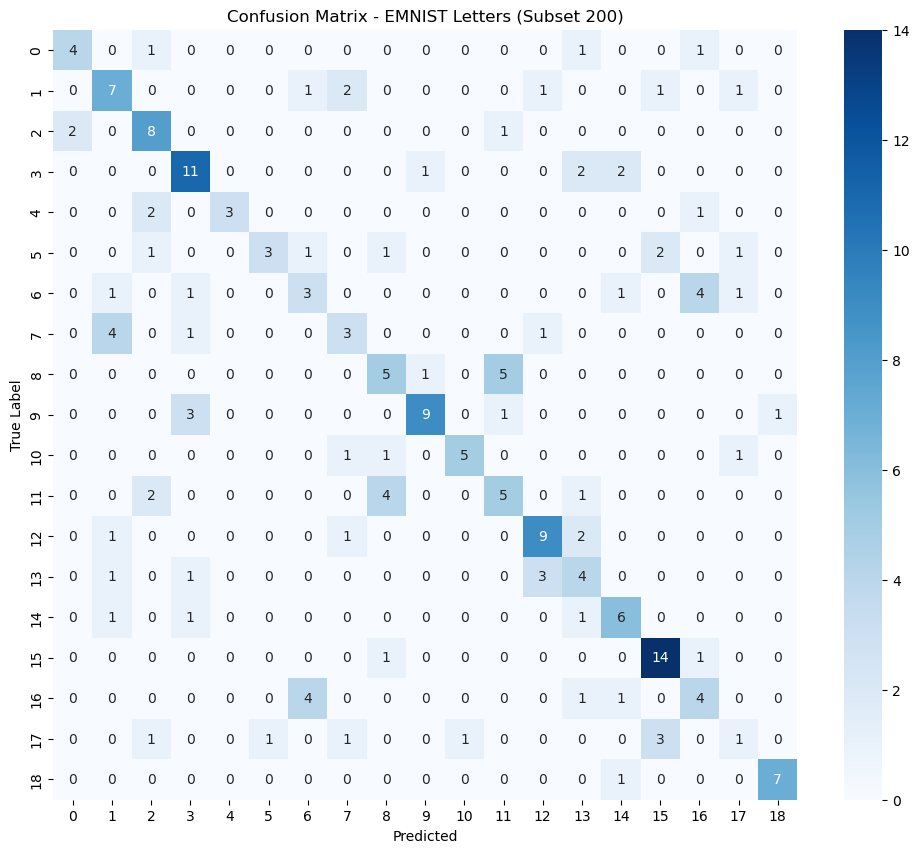

In [31]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - EMNIST Letters (Subset 200)")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()